In [1]:
import os
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import pickle

logging.getLogger("stringmethod").setLevel(logging.ERROR)
sys.path.append("../string-method-gmxapi/")
import src.analysis as spc
import src.analysis.figures as figures

['/data/sperez/Projects/string_sims/notebooks', '/data/sperez/Projects/string_sims/notebooks', '/home/sperez/Projects/spc_utils', '/home/sperez/Projects/string-method-gmxapi', '/home/sperez/Projects/string-method-swarms-trajectories', '/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python38.zip', '/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8', '/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8/lib-dynload', '', '/home/sperez/.local/lib/python3.8/site-packages', '/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8/site-packages', '/data/sperez/Projects/string_sims', '../string-method-gmxapi/', '/home/sperez/Projects/string-method-gmxapi/stringmethod/simulations/../../']


In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

# Main text

## Load data

This notebook needs to run in the string simulation folder, this cell will get you there. You also set up a path for writing the figures.

In [3]:
path_raw = os.path.expanduser(f"~/Projects/string_sims/data/raw/")
path_interim = os.path.expanduser(f"~/Projects/string_sims/data/interim/")
path_processed = os.path.expanduser(f"~/Projects/string_sims/data/processed/")
path_XRD = os.path.expanduser(f"~/Projects/string_sims/models/raw_pdb/")
path_report = os.path.expanduser(f"~/Projects/string_sims/reports/final_figures/plots/")
path_report_si = os.path.expanduser(
    f"~/Projects/string_sims/reports/final_figures_si/plots/"
)
os.chdir(path_raw)
os.getcwd()

'/data/sperez/Projects/string_sims/data/raw'

In [4]:
os.chdir(path_XRD)
with open(
    os.path.expanduser("~/Projects/string_sims/data/processed/XRD/XRD.pickle"), "rb"
) as handle:
    XRD_dictionary = pickle.load(handle)
os.chdir(path_raw)

/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:423: UserWarning: Failed to read CRYST1 record, possibly invalid PDB file, got:
CRYST1  80.6809     80.6809     106.5430   90.0  90.0  90.0
  warnings.warn("Failed to read CRYST1 record, "
/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:423: UserWarning: Failed to read CRYST1 record, possibly invalid PDB file, got:
CRYST1   80.754  549.000539549.000   0.24  84.00   0.00 P 1           1
  warnings.warn("Failed to read CRYST1 record, "
/home/sperez/data_partition/bin2/anaconda3/envs/string_sims/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:423: UserWarning: Failed to read CRYST1 record, possibly invalid PDB file, got:
CRYST1   80.738  758.000380758.000   8.92  73.00   0.00 P 1           1
  warnings.warn("Failed to read CRYST1 record, "


In [5]:
sim_name = {
    "LB-CHARMM": "LB-CHARMM",
    "LB-AMBER": "LB-AMBER",
    "noLB-AMBER": "noLB-AMBER",
}

In [6]:
colors = {
    "LB-CHARMM": "C0",
    "LB-AMBER": "C1",
    "noLB-AMBER": "C3",
}

## SF vs IG FES

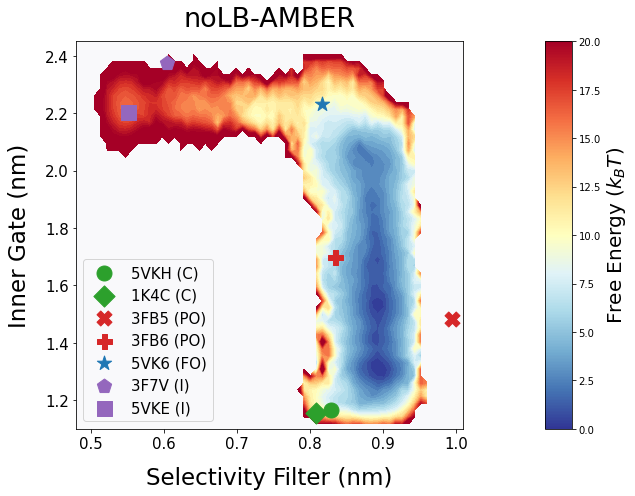

In [7]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
fig, ax = figures.final_FES_IG_SF(
    name, path_processed, path_report, XRD_dictionary, fig_title, show_cbar=True
)

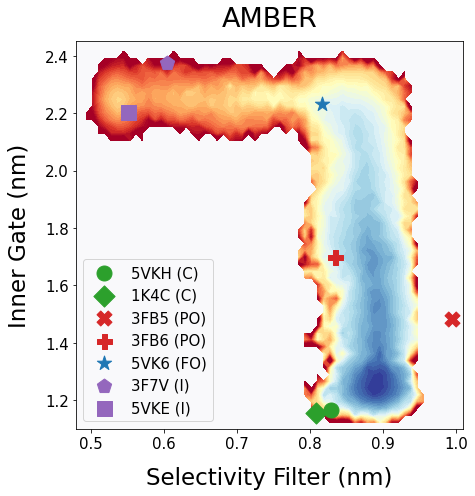

In [8]:
name = "LB-AMBER"
fig_title = "AMBER"
fig, ax = figures.final_FES_IG_SF(
    name, path_processed, path_report, XRD_dictionary, fig_title, show_cbar=False
)

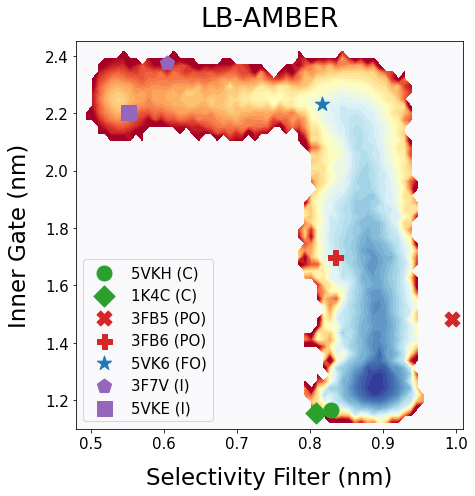

In [9]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_FES_IG_SF(
    name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    show_cbar=False,
    version="v2",
)

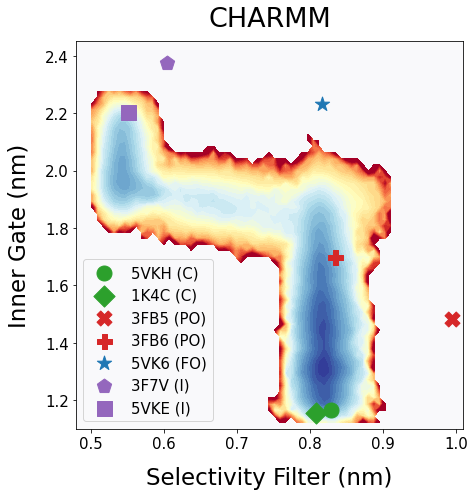

In [10]:
name = "LB-CHARMM"
fig_title = "CHARMM"
fig, ax = figures.final_FES_IG_SF(
    name, path_processed, path_report, XRD_dictionary, fig_title, show_cbar=False
)

## Path CVs FES

In [11]:
error = {
    "LB-CHARMM": [100, 3],
    "LB-AMBER": [100, 3],
    "noLB-AMBER": [100, 3],
}

(<Figure size 720x504 with 1 Axes>,
 <AxesSubplot:xlabel='$s_{path}$', ylabel='Free Energy ($k_BT$)'>)

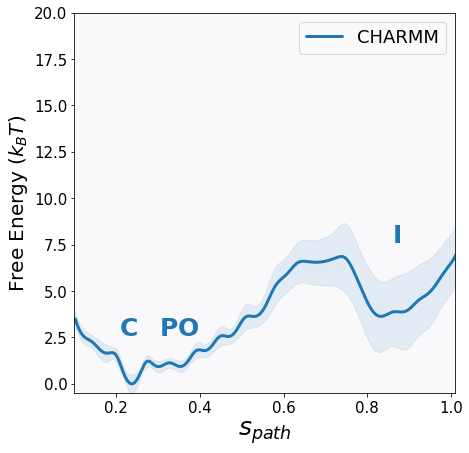

In [12]:
name = "LB-CHARMM"
annotations = {
    "positions": [[0.23, 3], [0.35, 3], [0.87, 8]],
    "names": [r"$\bf{C}$", r"$\bf{PO}$", r"$\bf{I}$"],
    "fontsize": 25,
    "color": colors[name],
}
figures.final_1D_path(
    path_processed,
    name,
    error[name],
    "CHARMM",
    colors[name],
    path_report,
    annotations=annotations,
)

(<Figure size 720x504 with 1 Axes>,
 <AxesSubplot:xlabel='$s_{path}$', ylabel='Free Energy ($k_BT$)'>)

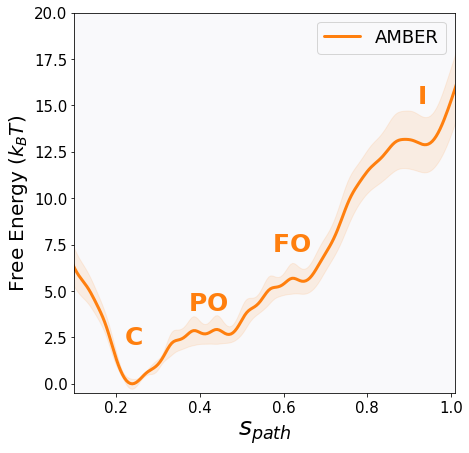

In [13]:
name = "LB-AMBER"
annotations = {
    "positions": [[0.24, 2.5], [0.42, 4.35], [0.62, 7.5], [0.93, 15.5]],
    "names": [r"$\bf{C}$", r"$\bf{PO}$", r"$\bf{FO}$", r"$\bf{I}$"],
    "fontsize": 25,
    "color": colors[name],
}
figures.final_1D_path(
    path_processed,
    name,
    error[name],
    "AMBER",
    colors[name],
    path_report,
    annotations=annotations,
)

(<Figure size 720x504 with 1 Axes>,
 <AxesSubplot:xlabel='$s_{path}$', ylabel='Free Energy ($k_BT$)'>)

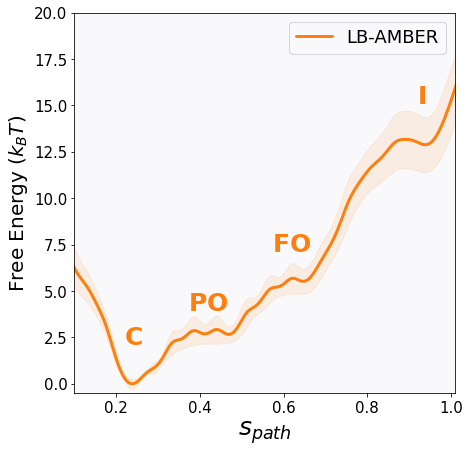

In [14]:
name = "LB-AMBER"
annotations = {
    "positions": [[0.24, 2.5], [0.42, 4.35], [0.62, 7.5], [0.93, 15.5]],
    "names": [r"$\bf{C}$", r"$\bf{PO}$", r"$\bf{FO}$", r"$\bf{I}$"],
    "fontsize": 25,
    "color": colors[name],
}
figures.final_1D_path(
    path_processed,
    name,
    error[name],
    "LB-AMBER",
    colors[name],
    path_report,
    version="_v2",
    annotations=annotations,
)

(<Figure size 720x504 with 1 Axes>,
 <AxesSubplot:xlabel='$s_{path}$', ylabel='Free Energy ($k_BT$)'>)

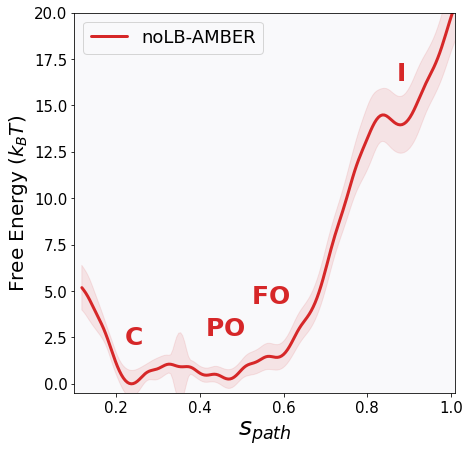

In [15]:
name = "noLB-AMBER"
annotations = {
    "positions": [[0.24, 2.5], [0.46, 3.0], [0.57, 4.7], [0.88, 16.7]],
    "names": [r"$\bf{C}$", r"$\bf{PO}$", r"$\bf{FO}$", r"$\bf{I}$"],
    "fontsize": 25,
    "color": colors[name],
}
figures.final_1D_path(
    path_processed,
    name,
    error[name],
    "noLB-AMBER",
    colors[name],
    path_report,
    annotations=annotations,
)

## Project water in SF

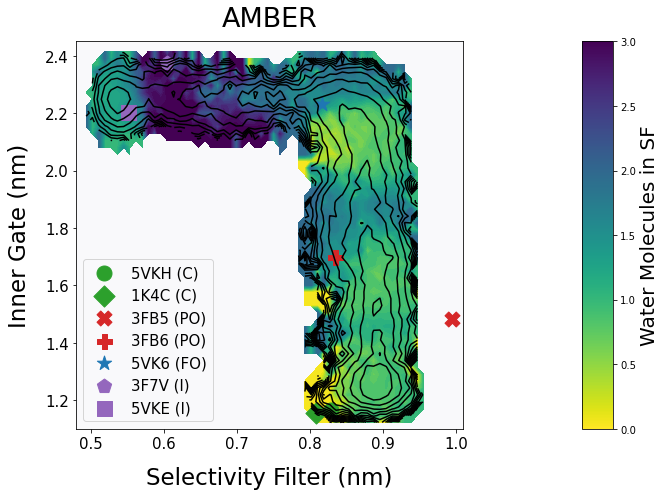

In [16]:
name = "LB-AMBER"
fig_title = "AMBER"
with open(f"{path_processed}/{name}/SF_occupation_data.pkl", "rb") as handle:
    SF_occupation_data = pickle.load(handle)
cv_data = SF_occupation_data["W"]["all"]
cv_label = "Water Molecules in SF"
cv_name = f"H2O_in_SF_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=3,
)

## Path CV vs CV FES

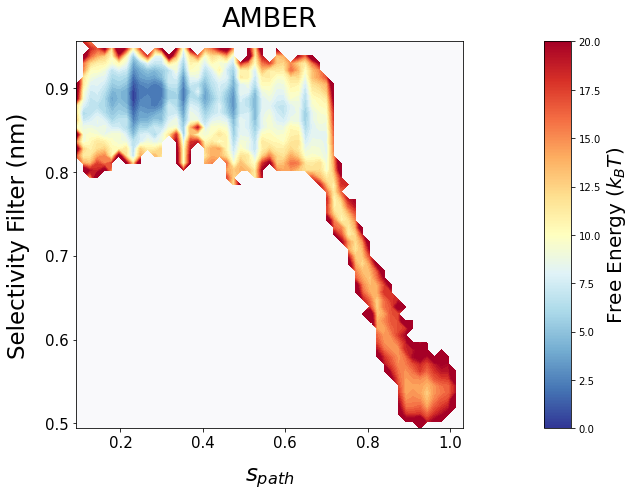

In [17]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "SF"
ylabel = "Selectivity Filter (nm)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=True,
)

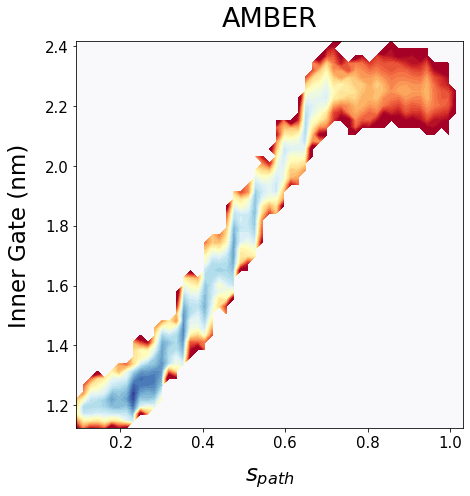

In [18]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "IG"
ylabel = "Inner Gate (nm)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=False,
)

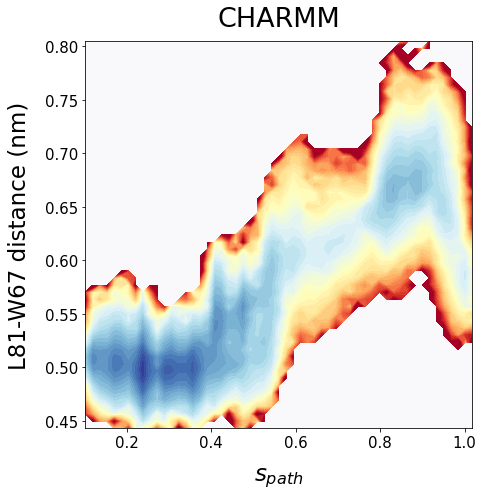

In [19]:
name = "LB-CHARMM"
fig_title = "CHARMM"
cv_name = "L81-W67"
ylabel = "L81-W67 distance (nm)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=False,
)

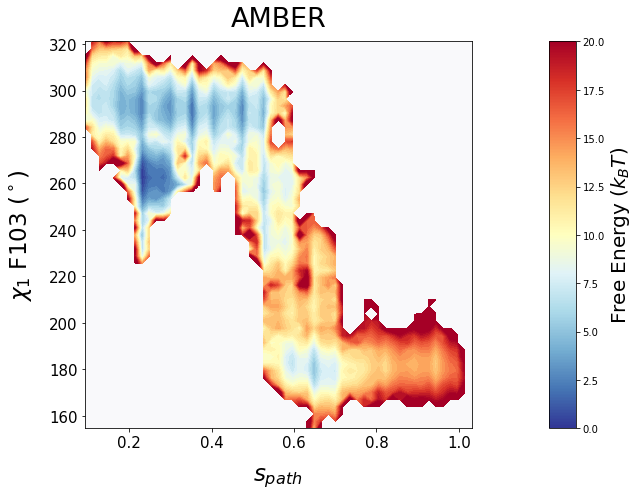

In [20]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "chi1_F103"
ylabel = r"$\chi_1$ F103 ($^\circ$)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=True,
)

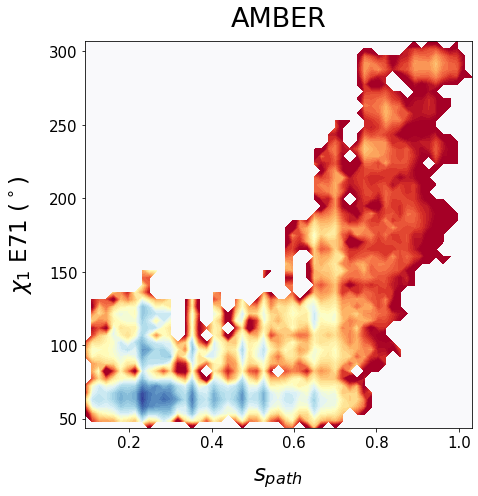

In [21]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "chi1_E71"
ylabel = r"$\chi_1$ E71 ($^\circ$)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=False,
)

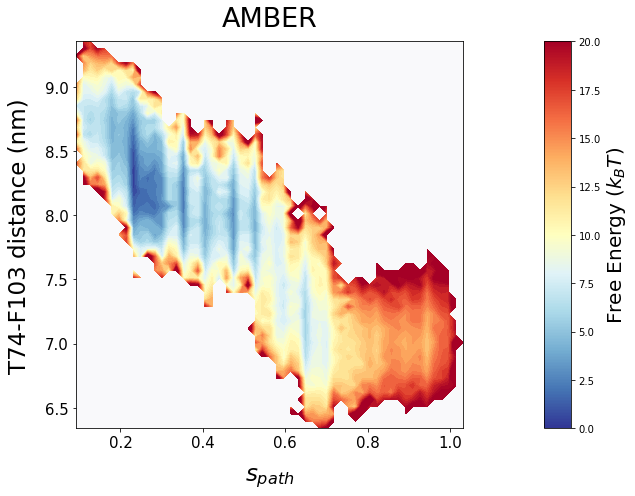

In [22]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "dis_T74-F103"
ylabel = "T74-F103 distance (nm)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=True,
)

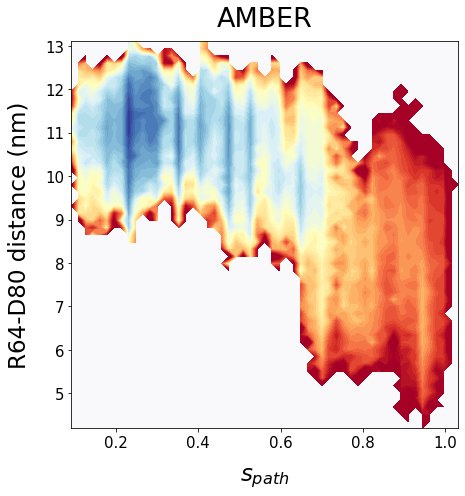

In [23]:
name = "LB-AMBER"
fig_title = "AMBER"
cv_name = "dis_R64-D80"
ylabel = "R64-D80 distance (nm)"
fig, ax = figures.final_FES_path_CV(
    name,
    cv_name,
    path_processed,
    path_report,
    XRD_dictionary,
    fig_title,
    ylabel,
    show_cbar=False,
)

# Supplementary info

## 2D string convergence

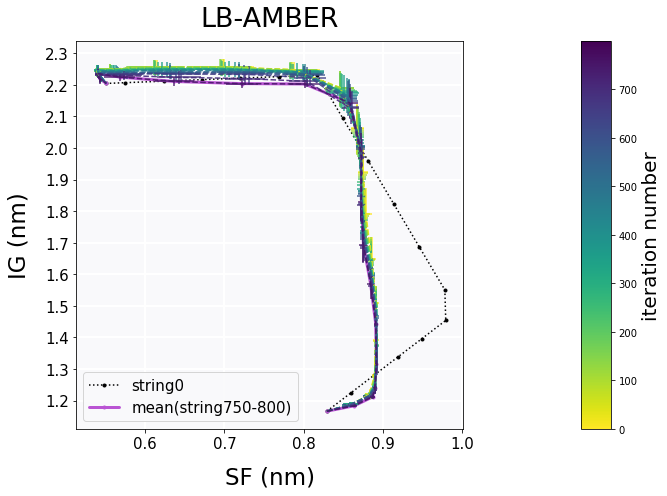

In [24]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_2D_string_convergence(name, path_raw, path_report_si, fig_title)

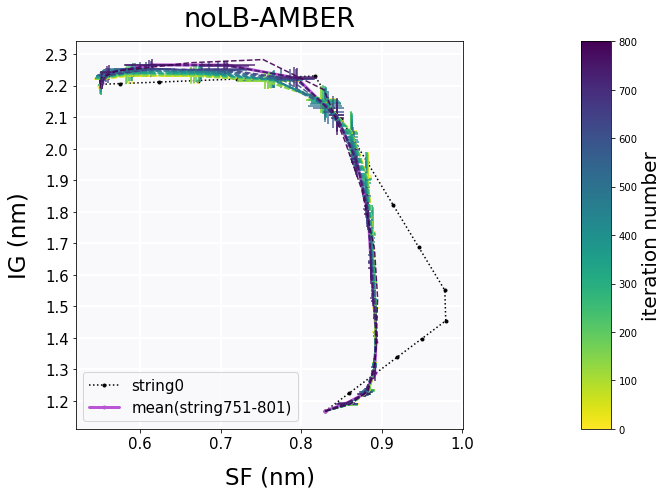

In [25]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
fig, ax = figures.final_2D_string_convergence(name, path_raw, path_report_si, fig_title)

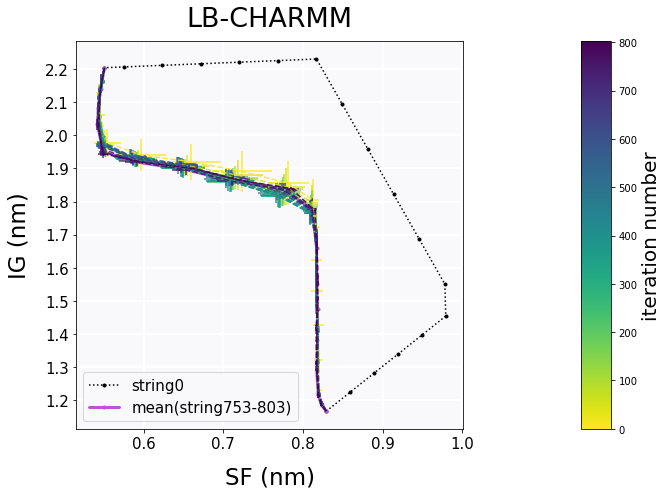

In [26]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
fig, ax = figures.final_2D_string_convergence(name, path_raw, path_report_si, fig_title)

## RMSD convergence

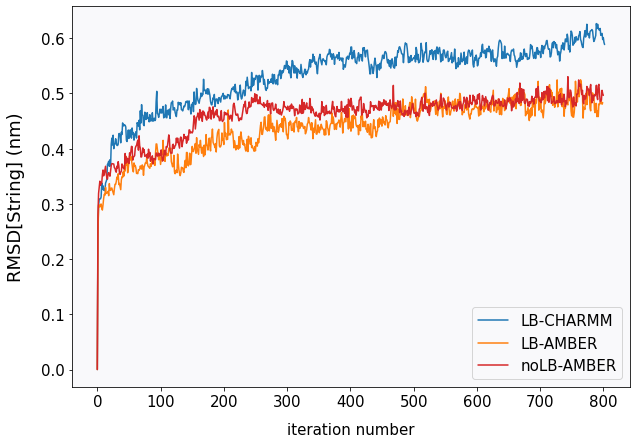

In [27]:
fig, ax = figures.final_rmsd_string(path_raw, path_report_si, sim_name)

## Time series of W67-L81 contact

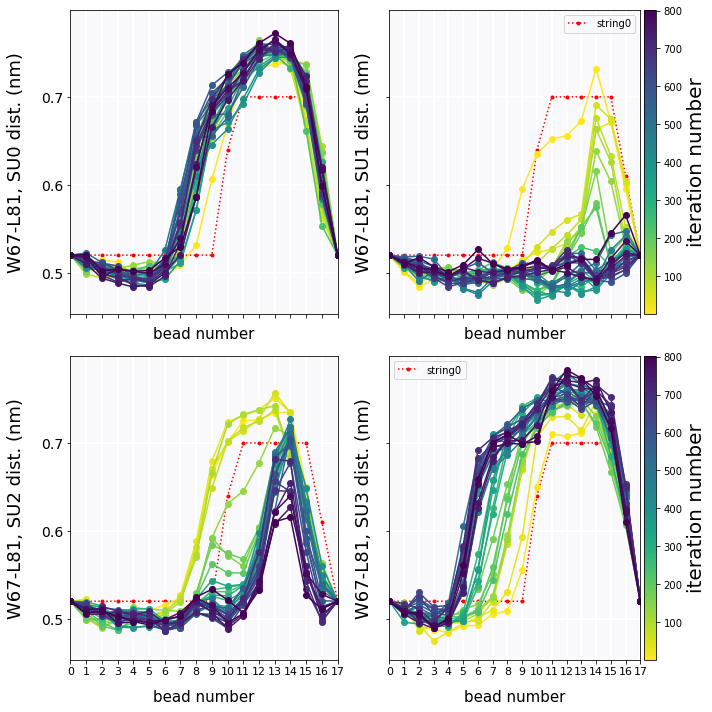

In [28]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
fig, ax = figures.final_strings_vs_time_series(
    name, path_raw, path_report_si, fig_title
)

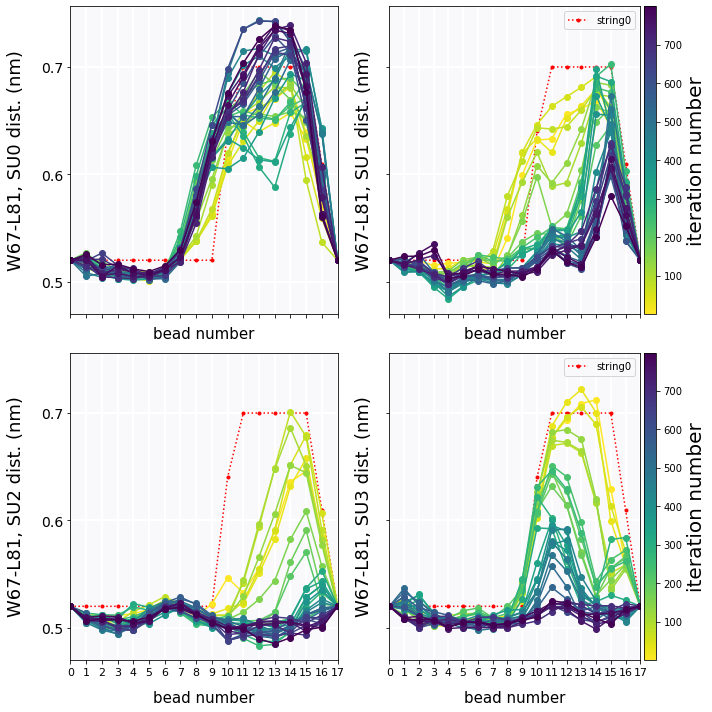

In [47]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_strings_vs_time_series(
    name, path_raw, path_report_si, fig_title
)

## Error SF vs IG FES

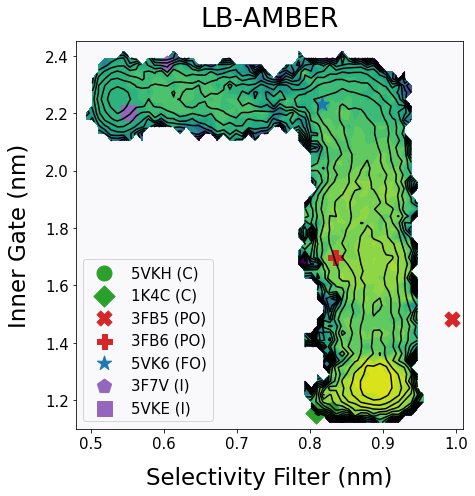

In [29]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_FES_IG_SF_error(
    name, path_processed, path_report_si, XRD_dictionary, fig_title, show_cbar=False
)

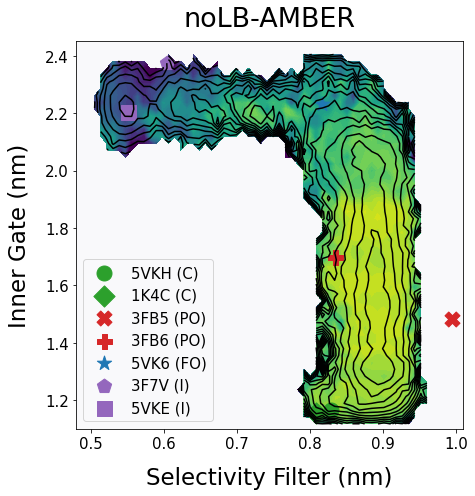

In [30]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
fig, ax = figures.final_FES_IG_SF_error(
    name, path_processed, path_report_si, XRD_dictionary, fig_title, show_cbar=False
)

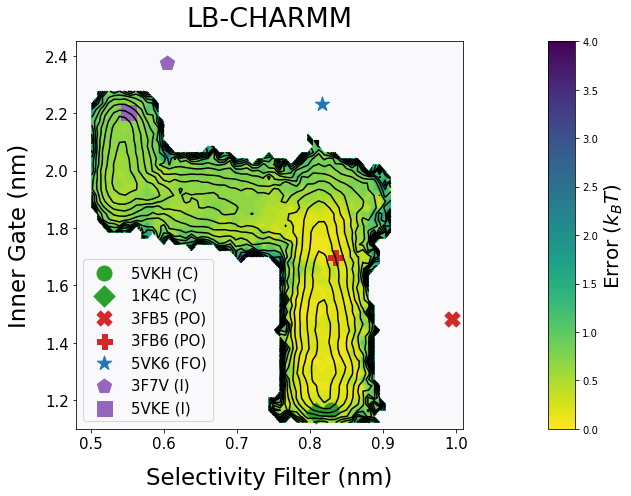

In [31]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
fig, ax = figures.final_FES_IG_SF_error(
    name, path_processed, path_report_si, XRD_dictionary, fig_title, show_cbar=True
)

## SF vs IG FES Trajectories

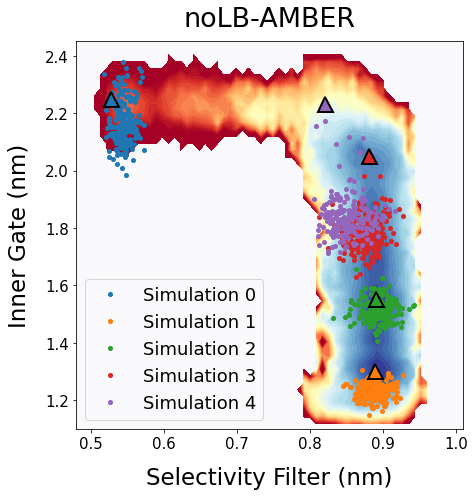

In [32]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
fig, ax = figures.final_FES_IG_SF(
    name,
    path_processed,
    path_report_si,
    None,
    fig_title,
    show_cbar=False,
    restarts=True,
    version="_traj",
)

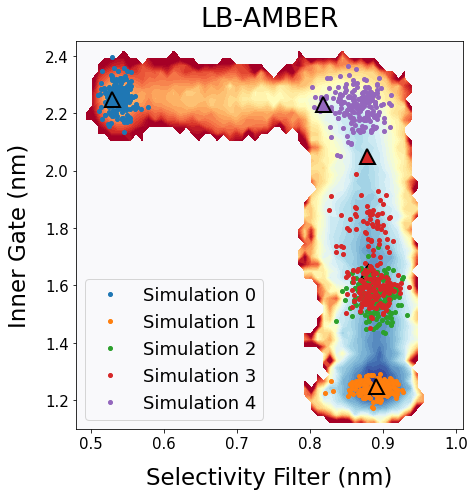

In [33]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_FES_IG_SF(
    name,
    path_processed,
    path_report_si,
    None,
    fig_title,
    show_cbar=False,
    restarts=True,
    version="_traj",
)

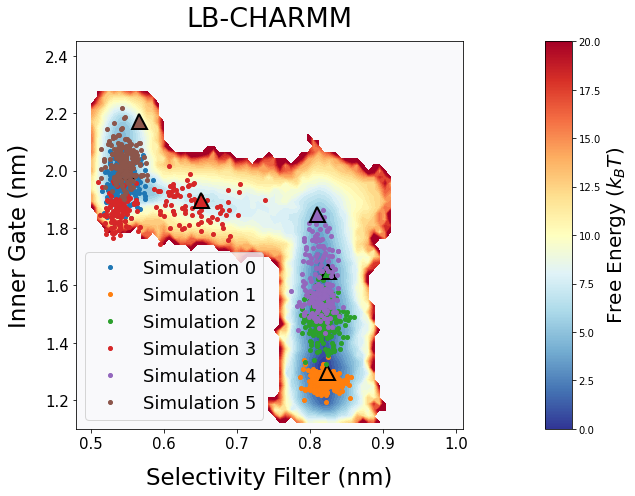

In [34]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
fig, ax = figures.final_FES_IG_SF(
    name,
    path_processed,
    path_report_si,
    None,
    fig_title,
    show_cbar=True,
    restarts=True,
    version="_traj",
)

## Project water in SF
### noLB-AMBER

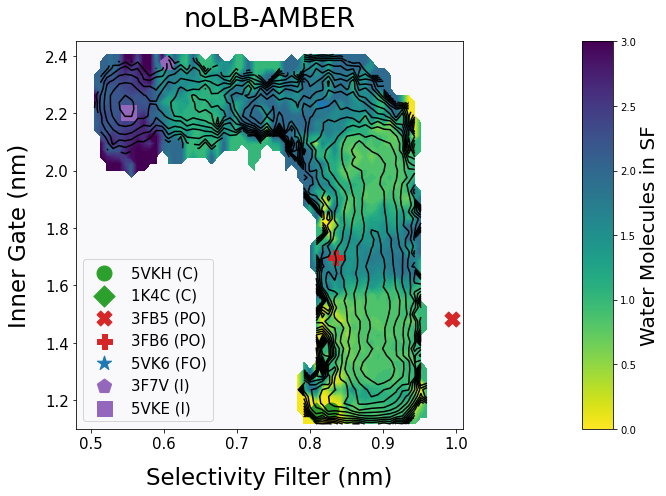

In [35]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
with open(f"{path_processed}/{name}/SF_occupation_data.pkl", "rb") as handle:
    SF_occupation_data = pickle.load(handle)
cv_data = SF_occupation_data["W"]["all"]
cv_label = "Water Molecules in SF"
cv_name = f"H2O_in_SF_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report_si,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=3,
)

### LB-CHARMM

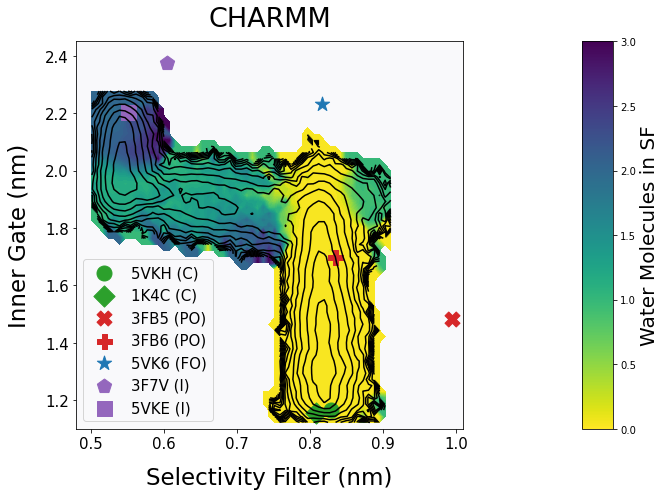

In [36]:
name = "LB-CHARMM"
fig_title = "CHARMM"
with open(f"{path_processed}/{name}/SF_occupation_data.pkl", "rb") as handle:
    SF_occupation_data = pickle.load(handle)
cv_data = SF_occupation_data["W"]["all"]
cv_label = "Water Molecules in SF"
cv_name = f"H2O_in_SF_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report_si,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=3,
)

## Project s_path on FES
### noLB-AMBER

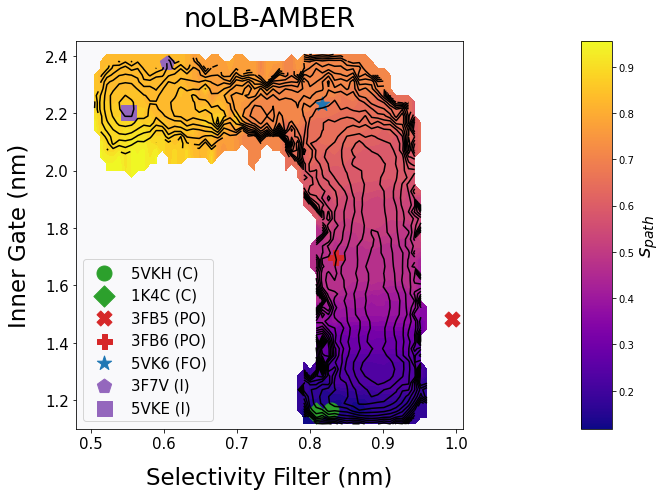

In [37]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
cv_data = np.load(f"{path_processed}/{name}/s_path_of_SF_IG.npy")
cv_label = "$s_{path}$"
cv_name = f"s_path_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report_si,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=None,
    cmap=plt.cm.plasma,
)

### LB-AMBER

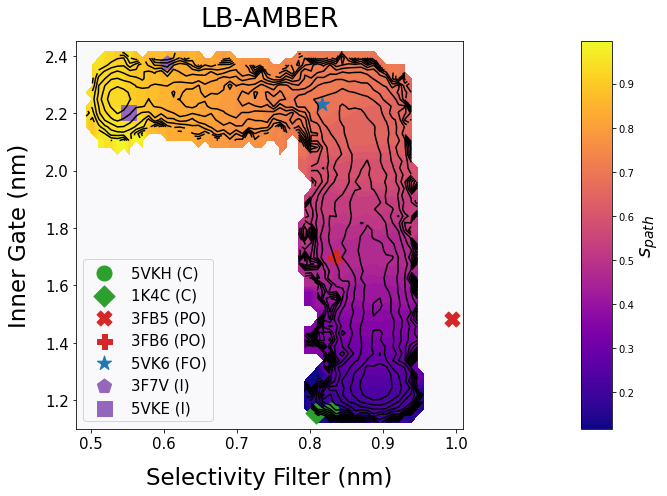

In [38]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
cv_data = np.load(f"{path_processed}/{name}/s_path_of_SF_IG.npy")
cv_label = "$s_{path}$"
cv_name = f"s_path_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report_si,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=None,
    cmap=plt.cm.plasma,
)

### LB-CHARMM

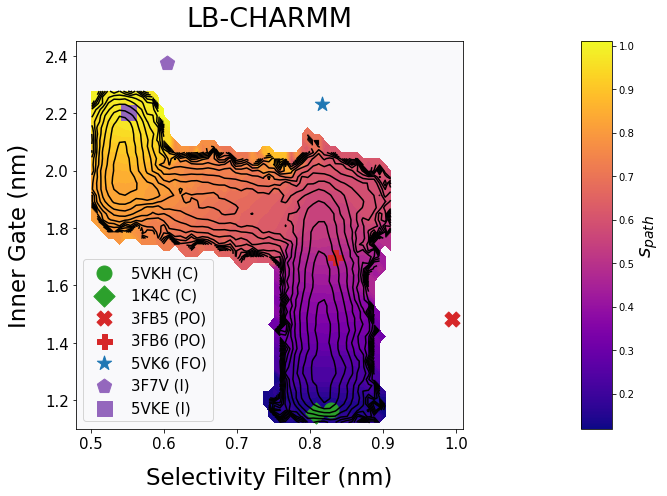

In [39]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
cv_data = np.load(f"{path_processed}/{name}/s_path_of_SF_IG.npy")
cv_label = "$s_{path}$"
cv_name = f"s_path_{name}"
fig, ax = figures.final_cv_projection(
    name,
    path_processed,
    path_report_si,
    cv_name,
    cv_data,
    cv_label,
    XRD_dictionary,
    fig_title,
    show_cbar=True,
    f_max=None,
    cmap=plt.cm.plasma,
)

## Project per site SF content

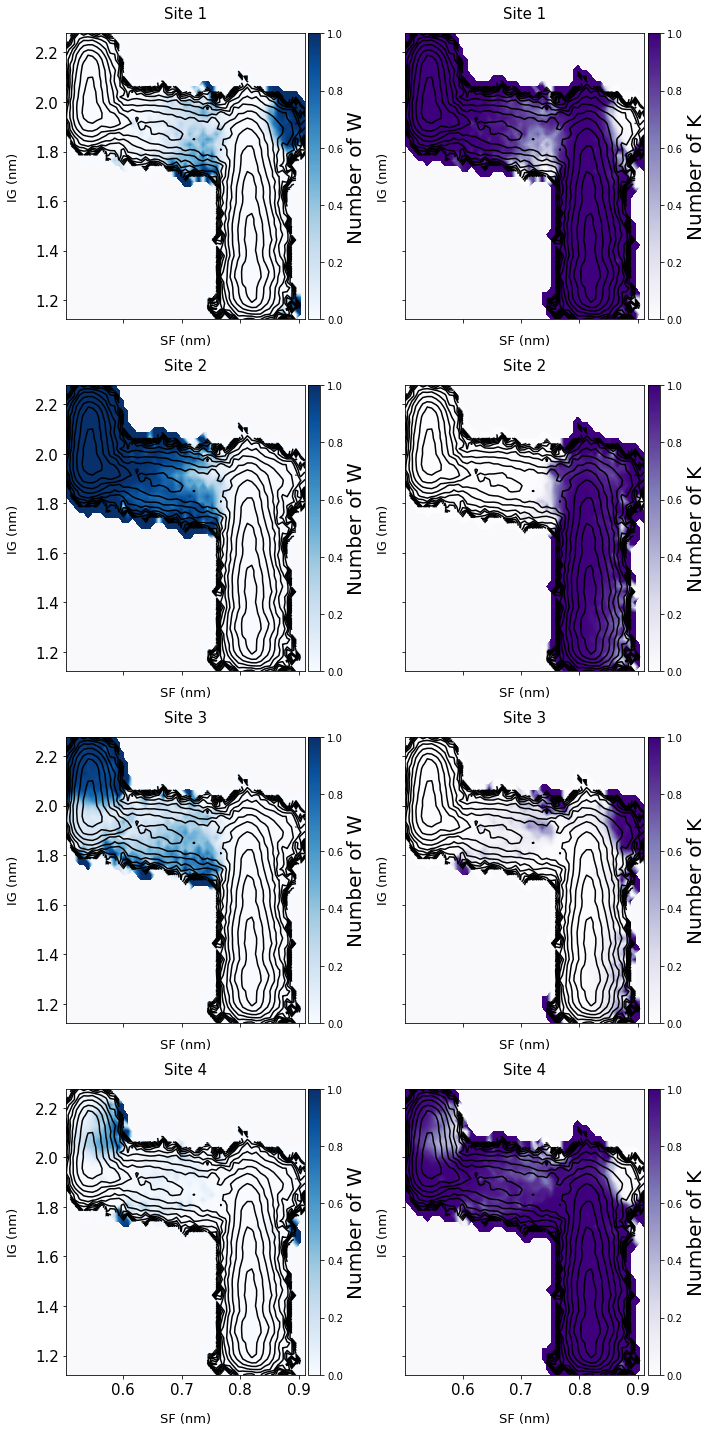

In [7]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
fig, ax = figures.final_SF_content(name, path_processed, path_report_si, fig_title)

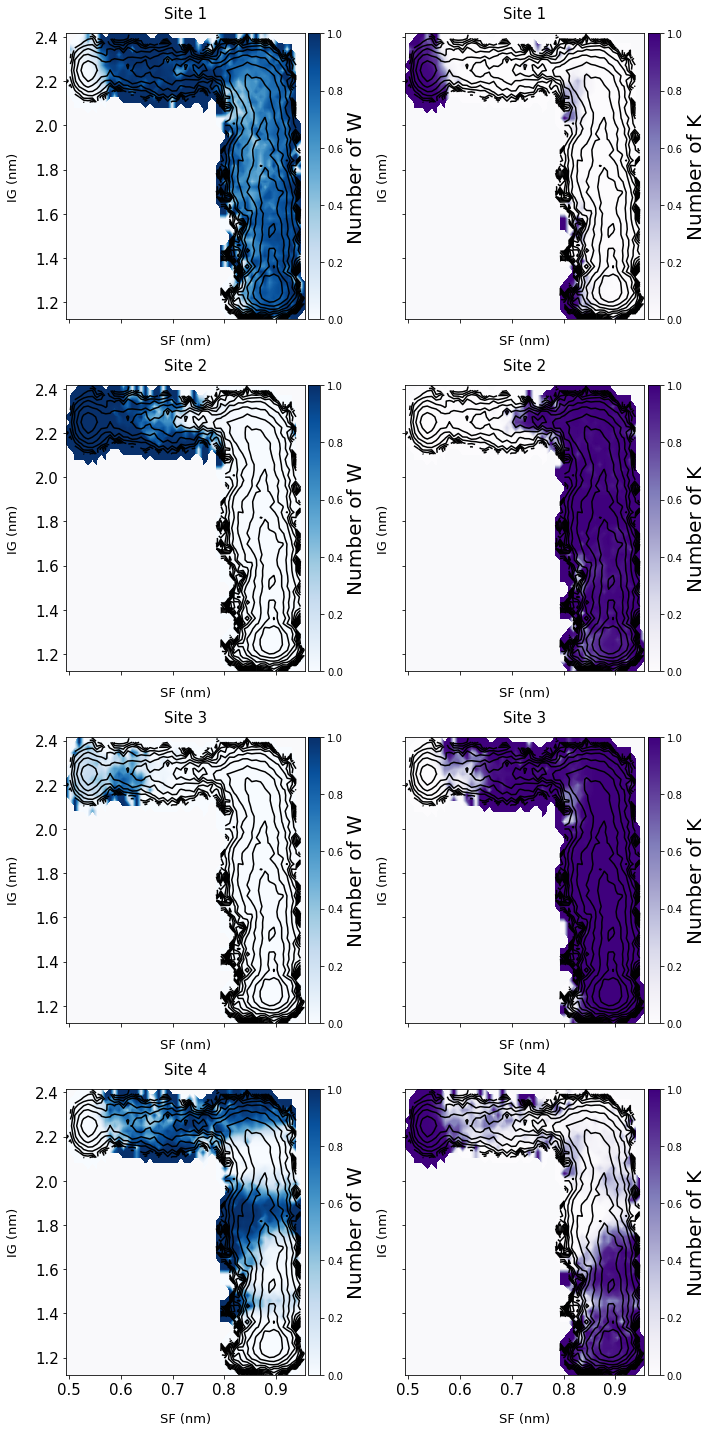

In [8]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
fig, ax = figures.final_SF_content(name, path_processed, path_report_si, fig_title)

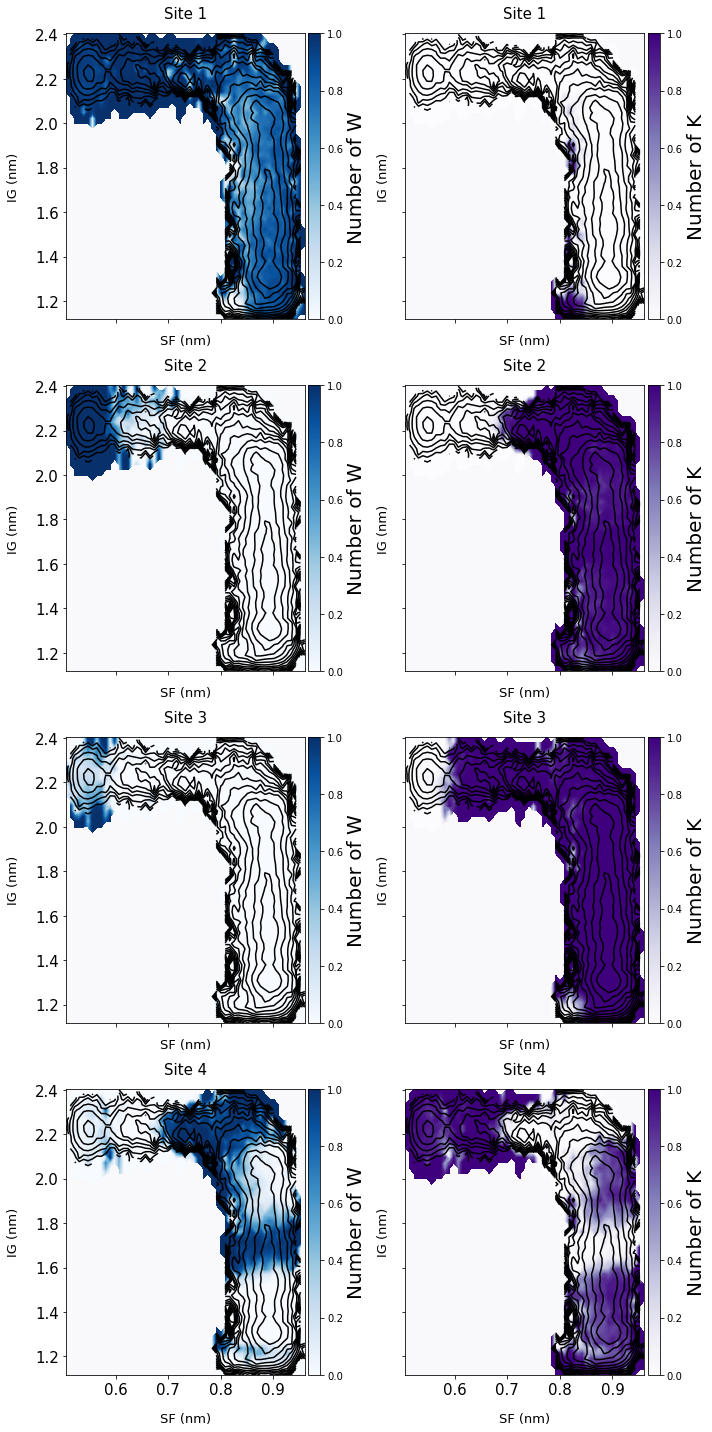

In [9]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
fig, ax = figures.final_SF_content(name, path_processed, path_report_si, fig_title)

## Path CV vs CV FES

### LB-AMBER

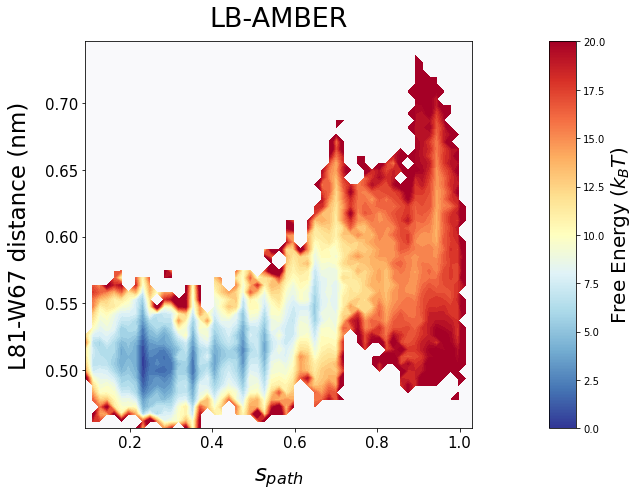

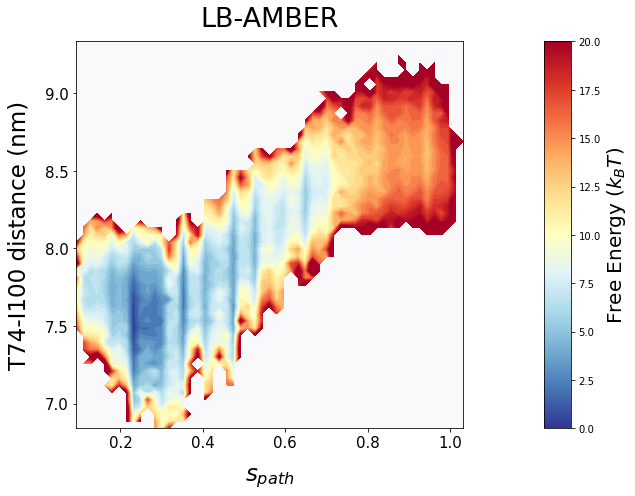

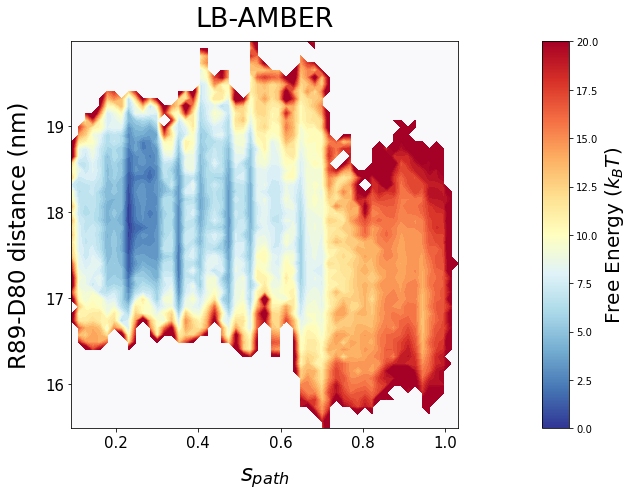

In [44]:
name = "LB-AMBER"
fig_title = "LB-AMBER"
plots = {
    "cv_name": [
        "L81-W67",
        "dis_T74-I100",
        "dis_R89-D80",
    ],
    "ylabel": [
        "L81-W67 distance (nm)",
        "T74-I100 distance (nm)",
        "R89-D80 distance (nm)",
    ],
}
for i in range(len(plots["cv_name"])):
    fig, ax = figures.final_FES_path_CV(
        name,
        plots["cv_name"][i],
        path_processed,
        path_report_si,
        XRD_dictionary,
        fig_title,
        plots["ylabel"][i],
        show_cbar=True,
        version="_AMBER",
    )

### LB-CHARMM

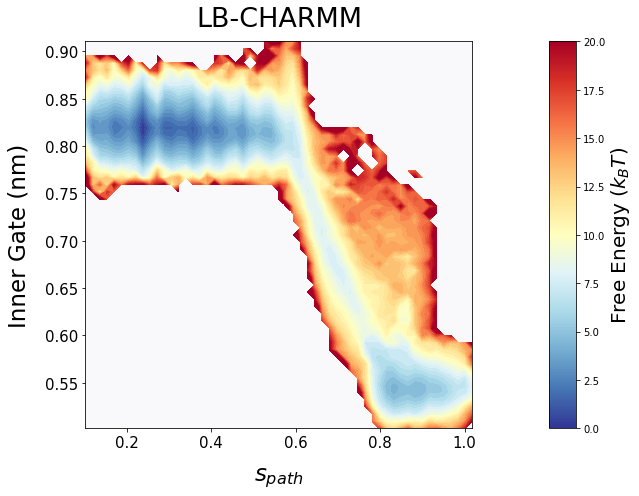

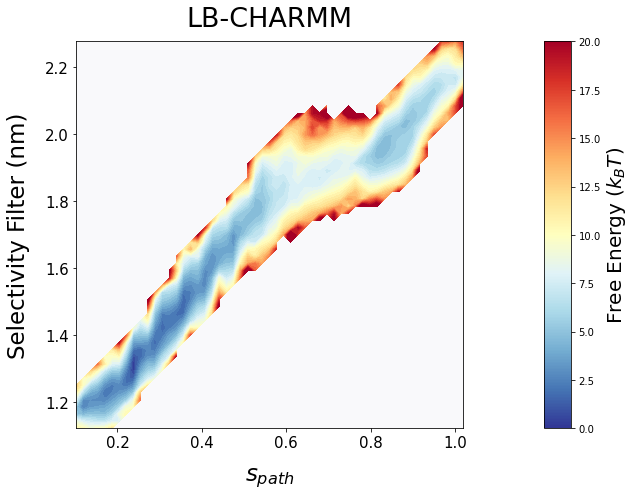

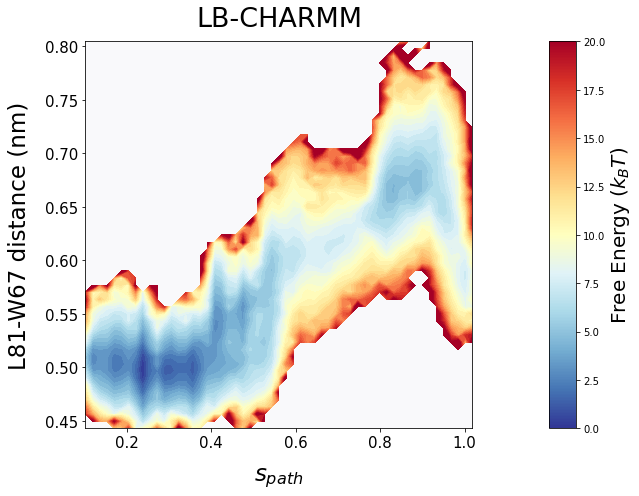

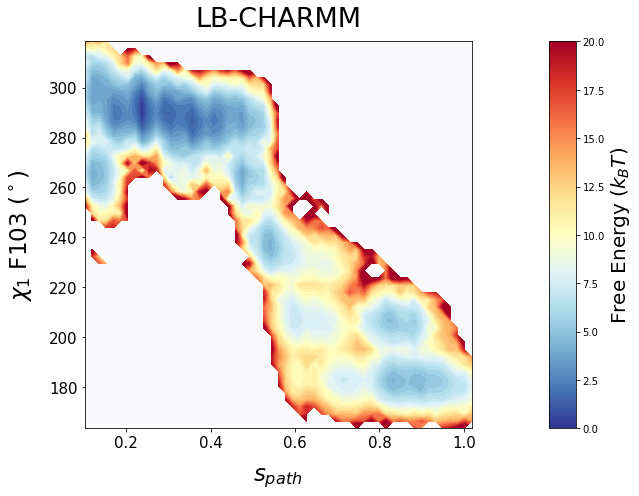

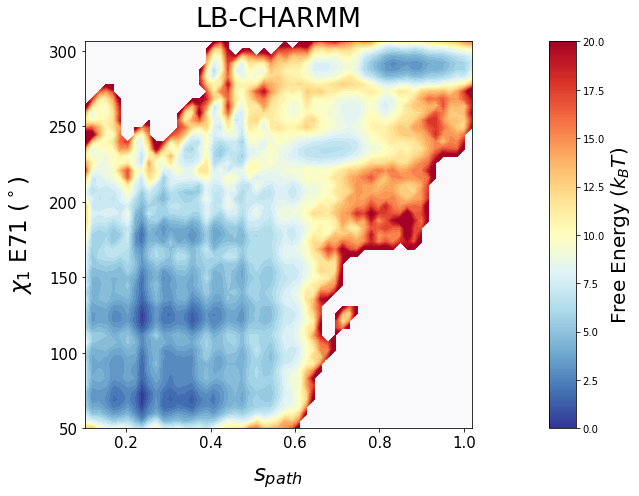

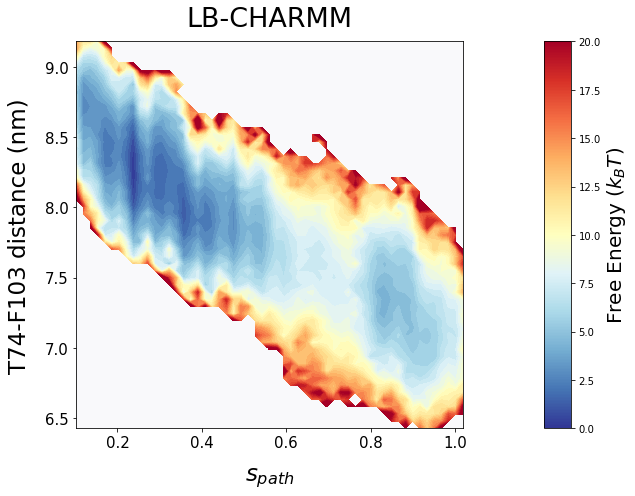

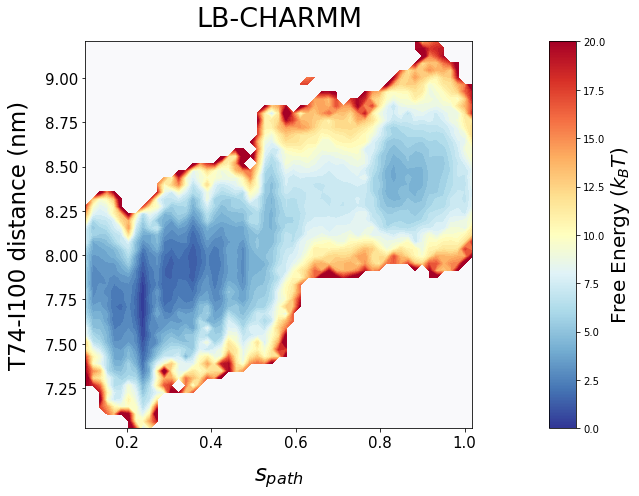

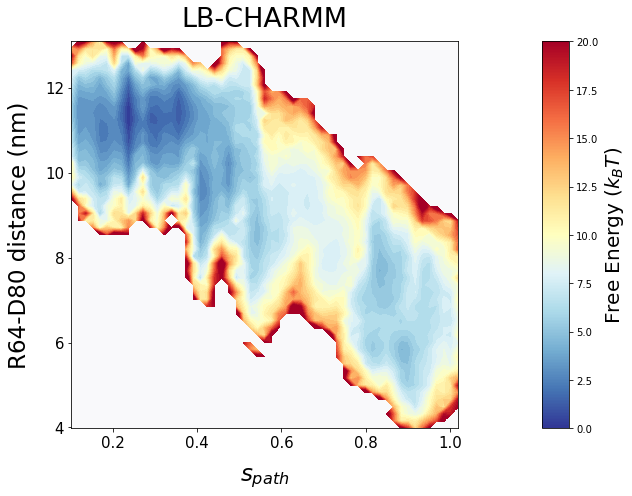

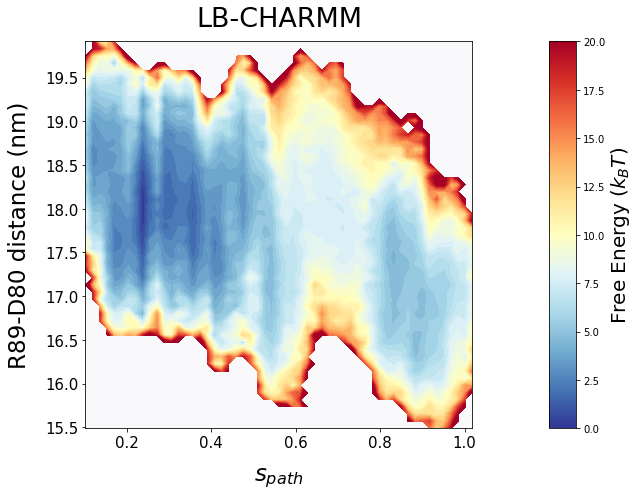

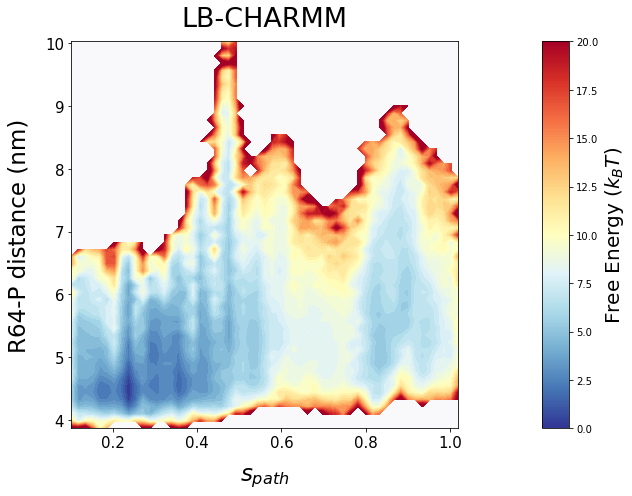

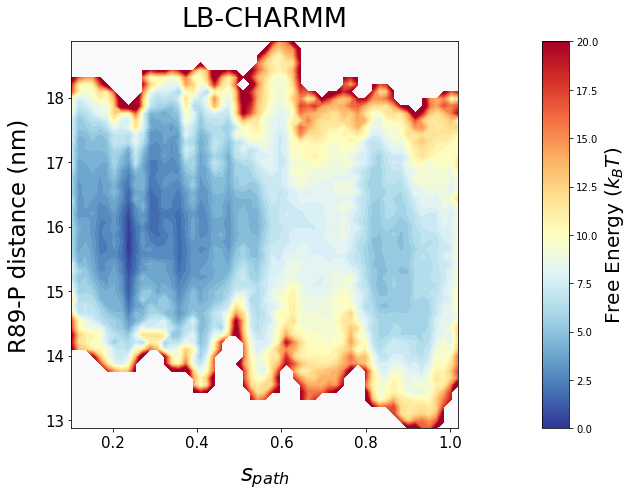

In [45]:
name = "LB-CHARMM"
fig_title = "LB-CHARMM"
plots = {
    "cv_name": [
        "SF",
        "IG",
        "L81-W67",
        "chi1_F103",
        "chi1_E71",
        "dis_T74-F103",
        "dis_T74-I100",
        "dis_R64-D80",
        "dis_R89-D80",
        "dis_P-R64",
        "dis_P-R89",
    ],
    "ylabel": [
        "Inner Gate (nm)",
        "Selectivity Filter (nm)",
        "L81-W67 distance (nm)",
        "$\chi_1$ F103 ($^\circ$)",
        "$\chi_1$ E71 ($^\circ$)",
        "T74-F103 distance (nm)",
        "T74-I100 distance (nm)",
        "R64-D80 distance (nm)",
        "R89-D80 distance (nm)",
        "R64-P distance (nm)",
        "R89-P distance (nm)",
    ],
}
for i in range(len(plots["cv_name"])):
    fig, ax = figures.final_FES_path_CV(
        name,
        plots["cv_name"][i],
        path_processed,
        path_report_si,
        XRD_dictionary,
        fig_title,
        plots["ylabel"][i],
        show_cbar=True,
        version="_CHARMM",
    )

### noLB-AMBER

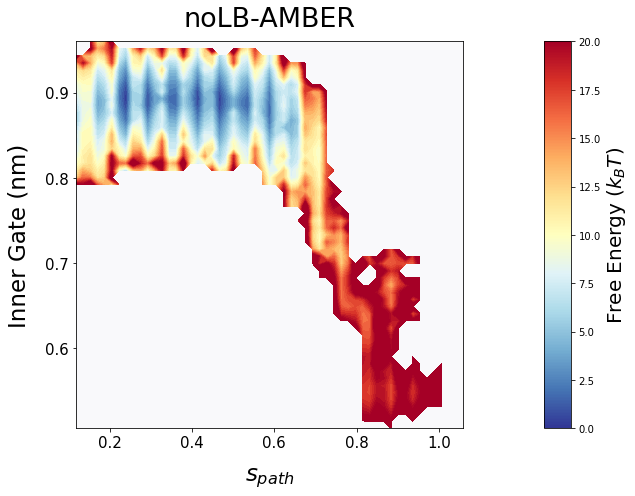

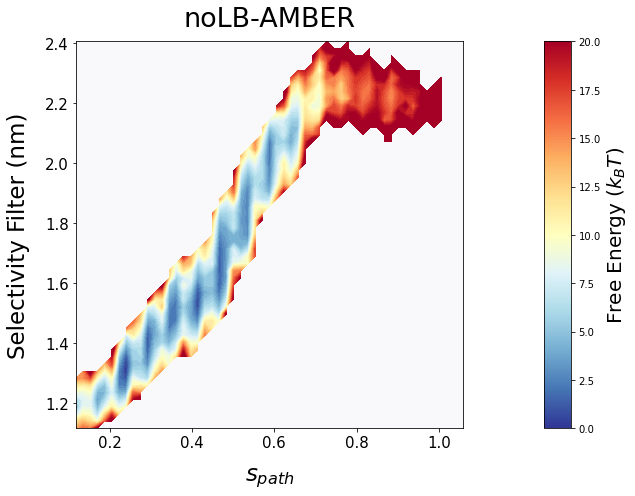

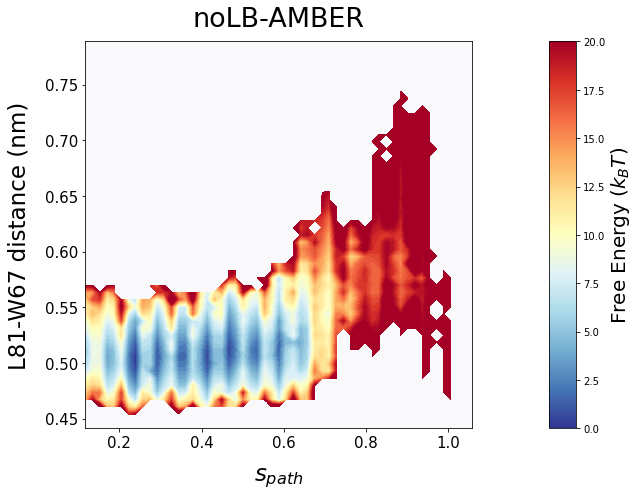

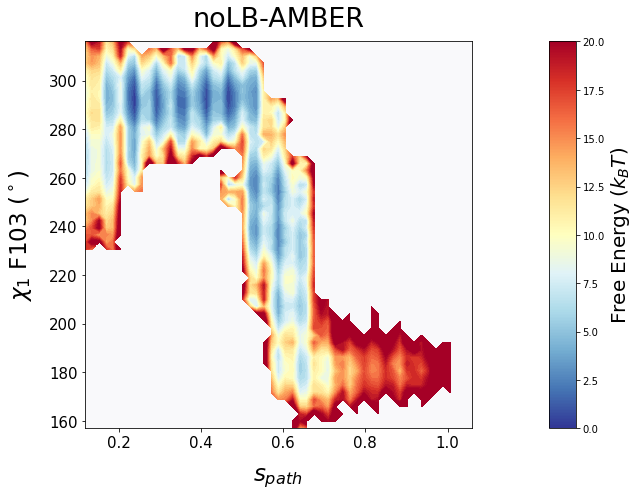

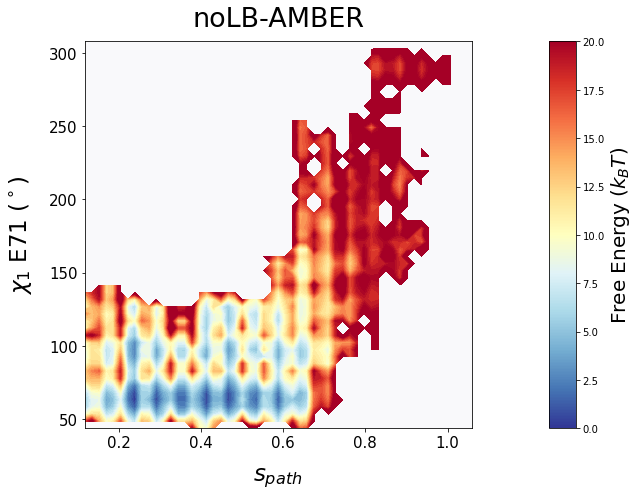

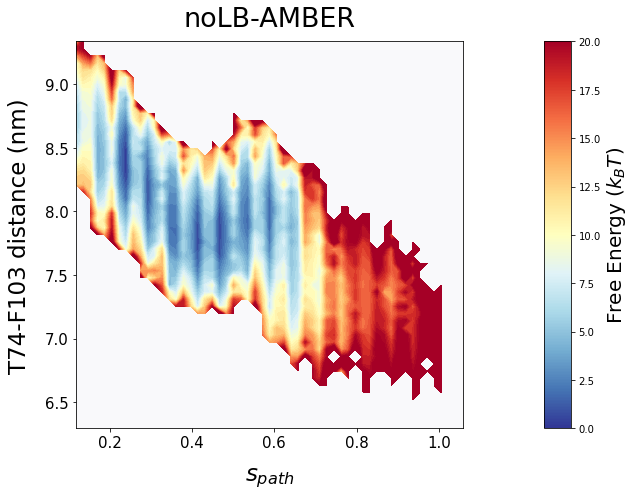

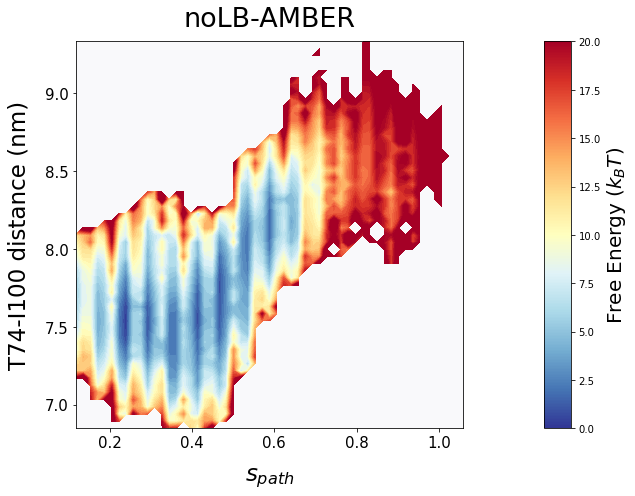

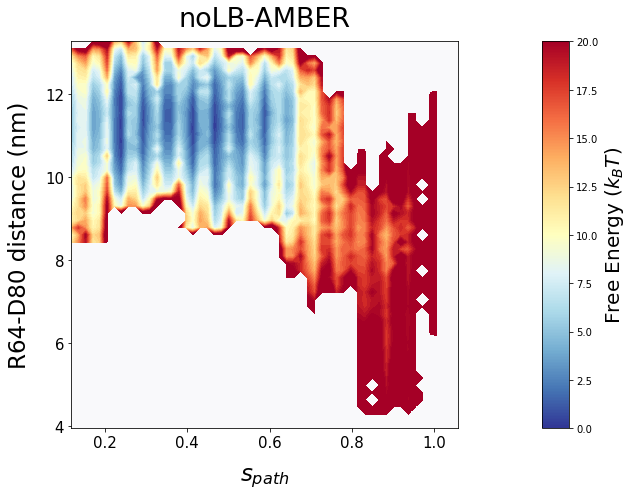

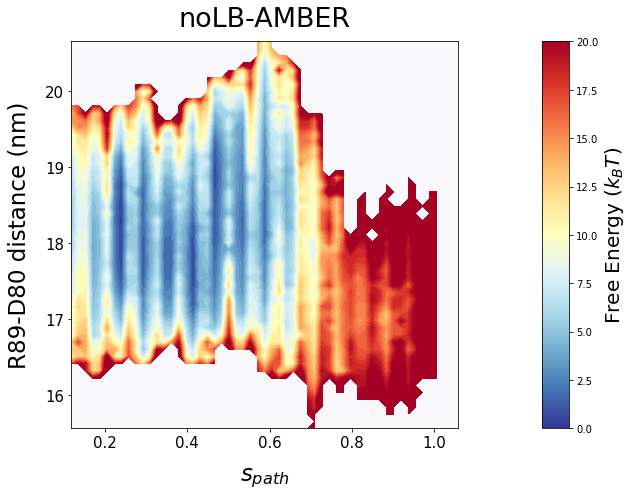

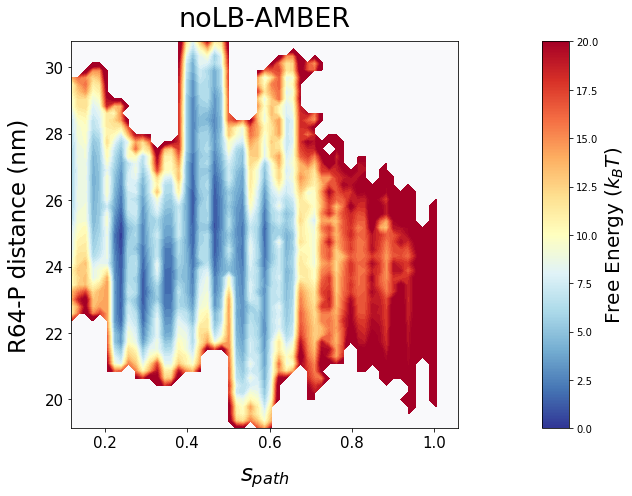

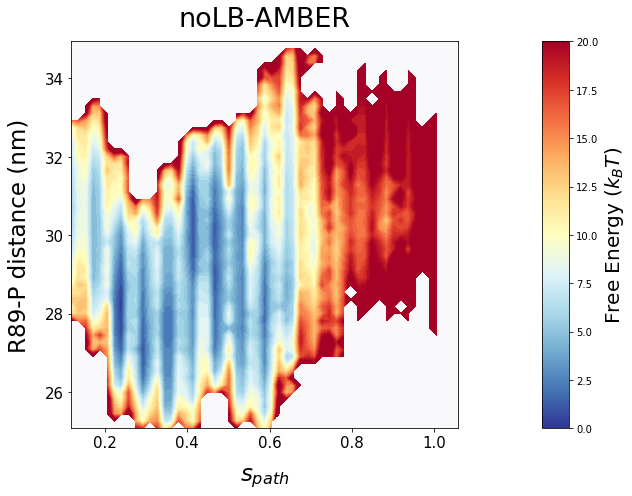

In [46]:
name = "noLB-AMBER"
fig_title = "noLB-AMBER"
plots = {
    "cv_name": [
        "SF",
        "IG",
        "L81-W67",
        "chi1_F103",
        "chi1_E71",
        "dis_T74-F103",
        "dis_T74-I100",
        "dis_R64-D80",
        "dis_R89-D80",
        "dis_P-R64",
        "dis_P-R89",
    ],
    "ylabel": [
        "Inner Gate (nm)",
        "Selectivity Filter (nm)",
        "L81-W67 distance (nm)",
        "$\chi_1$ F103 ($^\circ$)",
        "$\chi_1$ E71 ($^\circ$)",
        "T74-F103 distance (nm)",
        "T74-I100 distance (nm)",
        "R64-D80 distance (nm)",
        "R89-D80 distance (nm)",
        "R64-P distance (nm)",
        "R89-P distance (nm)",
    ],
}
for i in range(len(plots["cv_name"])):
    fig, ax = figures.final_FES_path_CV(
        name,
        plots["cv_name"][i],
        path_processed,
        path_report_si,
        XRD_dictionary,
        fig_title,
        plots["ylabel"][i],
        show_cbar=True,
        version="_noLB",
    )